In [ ]:
#train after augmentation
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.applications.vgg16 import preprocess_input

# Define directories
train_dir = '/content/drive/My Drive/Data_set/train_dataset'
test_dir = '/content/drive/My Drive/Data_set/test_dataset'

# Define parameters
batch_size = 32
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Generate training and testing datasets
train_image_generator = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# Build the model
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=test_data_gen.samples // batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(test_data_gen)
print("Test accuracy:", accuracy)



KeyError: "Registering two gradient with name 'DecodeRaw'! (Previous registration was in register /usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/registry.py:65)"

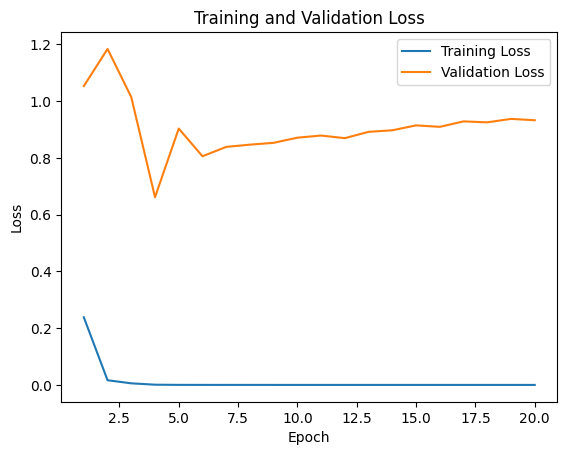

In [ ]:
import matplotlib.pyplot as plt

# Lấy thông tin lịch sử từ biến history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(train_loss) + 1)

# Vẽ đồ thị
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 175ms/step


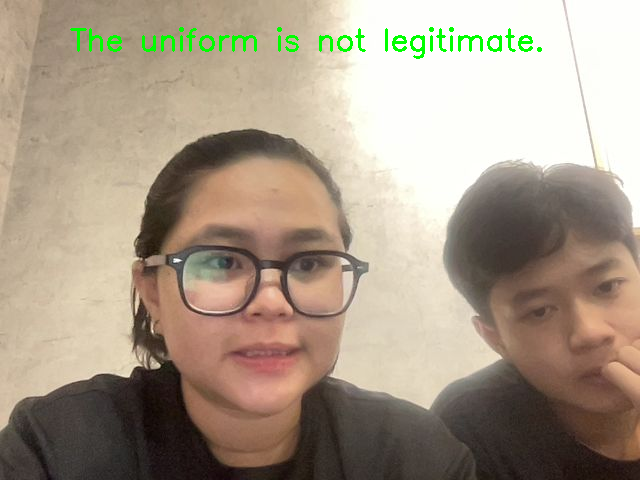

In [ ]:
import cv2
from PIL import Image
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from IPython.display import Image
import numpy as np

frame = take_photo()

test_image = image.load_img('photo.jpg', target_size=(150, 150))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.
prediction = model.predict(test_image)
if prediction > 0.8 and prediction < 1:
    text = "The uniform is legitimate."
else:
    text = "The uniform is not legitimate."

# Show the image which was just taken.

# Load the image
img = cv2.imread('photo.jpg')

# Add text to the image
font = cv2.FONT_HERSHEY_SIMPLEX
text_color = (0, 255, 0)
text_position = (70, 50)
cv2.putText(img, text, text_position, font, 1, text_color, 2)

# Display the image with text
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 5ms/step


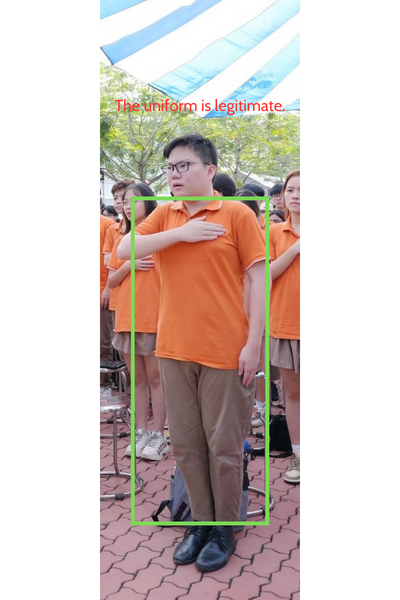

In [ ]:
import cv2
from PIL import Image
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from IPython.display import Image
import numpy as np

#frame = take_photo()

test_image = image.load_img('photo.jpg', target_size=(150, 150))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.
prediction = model.predict(test_image)
if prediction > 0.8 and prediction < 1:
    text = "The uniform is legitimate."
else:
    text = "The uniform is not legitimate."

# Show the image which was just taken.

# Load the image
img = cv2.imread('photo.jpg')

# Add text to the image
font = cv2.FONT_HERSHEY_SIMPLEX
text_color = (255, 0, 0)
text_position = (70, 50)
cv2.putText(img, text, text_position, font, 1, text_color, 2)

# Display the image with text
cv2_imshow(img)


1/1 [==============================] - 0s 35ms/step


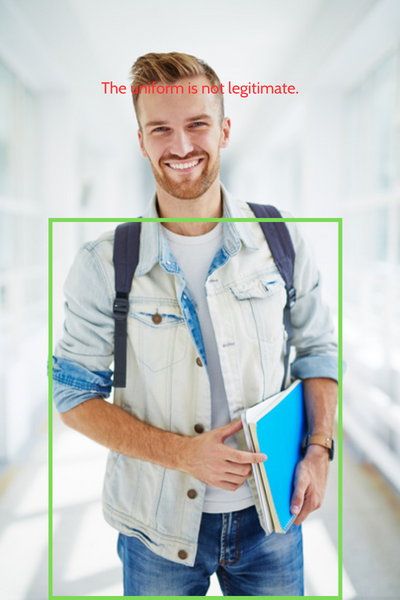

In [ ]:
import cv2
from PIL import Image
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from IPython.display import Image
import numpy as np

#frame = take_photo()

test_image = image.load_img('photo.jpg', target_size=(150, 150))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.
prediction = model.predict(test_image)
if prediction > 0.8 and prediction < 1:
    text = "The uniform is legitimate."
else:
    text = "The uniform is not legitimate."

# Show the image which was just taken.

# Load the image
img = cv2.imread('tes2.png')

# Add text to the image
font = cv2.FONT_HERSHEY_SIMPLEX
text_color = (255, 0, 0)
text_position = (70, 50)
cv2.putText(img, text, text_position, font, 1, text_color, 2)

# Display the image with text
cv2_imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [ ]:
from keras.preprocessing import image


test_image = image.load_img('hinh.jpg', target_size=(150, 150))
img_array = image.img_to_array(test_image)
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
#predicted_probability = prediction[0][0]
print(prediction)
# 4. Interpret the prediction
if prediction > 0.5:
    #if predicted_probability > 0.9:
        print("The person is wearing a uniform.")
    #else:
        #print("The person is likely wearing a uniform.")
else:
    #print("alo")
    #if predicted_probability < 0.1:
        print("The person is not wearing a uniform.")
    #else:
        #print("The person is likely not wearing a uniform.")

1/1 [==============================] - 0s 50ms/step
[[1.]]
The person is very likely wearing a uniform.


DATA AUGMENTATION

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Define directories
dir = '/content/drive/My Drive/Data_set'
train_uniform_dir = '/content/drive/My Drive/Data_set/train_dataset/uniform'
train_nonuniform_dir = '/content/drive/My Drive/Data_set/train_dataset/non-uniform'

# Create directories if they don't exist
os.makedirs(train_uniform_dir, exist_ok=True)
os.makedirs(train_nonuniform_dir, exist_ok=True)

# ImageDataGenerator with augmentation configurations
augmentation_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Retrieve the list of image filenames
uniform_images = [os.path.join(train_uniform_dir, fname) for fname in os.listdir(train_uniform_dir)]
nonuniform_images = [os.path.join(train_nonuniform_dir, fname) for fname in os.listdir(train_nonuniform_dir)]

# Augment and save images for the uniform dataset
for img_path in uniform_images:
    img = load_img(img_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    if str(os.path.basename(img_path)[0] + os.path.basename(img_path)[1] + os.path.basename(img_path)[2]) != "aug":
      for batch in augmentation_generator.flow(x, batch_size=1, save_to_dir=train_uniform_dir, save_prefix='aug_uniform', save_format='jpg'):
          i += 1
          if i >= 10:  # generate 10 augmented images per original image
              break

# Augment and save images for the non-uniform dataset

# for img_path in nonuniform_images:
#     img = load_img(img_path)
#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)
#     i = 0
#     if str(os.path.basename(img_path)[0] + os.path.basename(img_path)[1] + os.path.basename(img_path)[2]) != "aug":
#       for batch in augmentation_generator.flow(x, batch_size=1, save_to_dir=train_nonuniform_dir, save_prefix='aug_nonuniform', save_format='jpg'):
#           i += 1
#           if i >= 3:  # generate 10 augmented images per original image
#               break


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#train after augmentation
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.applications.vgg16 import preprocess_input

# Define directories
train_dir = '/content/drive/My Drive/Data_set/train_dataset'
test_dir = '/content/drive/My Drive/Data_set/test_dataset'

# Define parameters
batch_size = 32
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Generate training and testing datasets
train_image_generator = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# Build the model
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=test_data_gen.samples // batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(test_data_gen)
print("Test accuracy:", accuracy)




Found 9432 images belonging to 2 classes.
Found 388 images belonging to 2 classes.

Epoch 1/20
39/39 [==============================] - 421s 11s/step - loss: 0.1373 - accuracy: 0.9075 - val_loss: 1.0398 - val_accuracy: 0.9307
Epoch 2/20
39/39 [==============================] - 159s 4s/step - loss: 0.0065 - accuracy: 0.9926 - val_loss: 1.0135 - val_accuracy: 0.9255
Epoch 3/20
39/39 [==============================] - 150s 4s/step - loss: 0.0034 - accuracy: 0.9984 - val_loss: 1.0022 - val_accuracy: 0.9620
Epoch 4/20
39/39 [==============================] - 150s 4s/step - loss: 7.0096e-04 - accuracy: 1.0000 - val_loss: 0.5398 - val_accuracy: 0.9958
Epoch 5/20
39/39 [==============================] - 152s 4s/step - loss: 0.9971e-04 - accuracy: 1.0000 - val_loss: 0.8045 - val_accuracy: 0.903
Epoch 6/20
39/39 [==============================] - 145s 4s/step - loss: 0.0951e-04 - accuracy: 1.0000 - val_loss: 0.7372 - val_accuracy: 0.8880
Epoch 7/20
39/39 [==============================] - 156s 

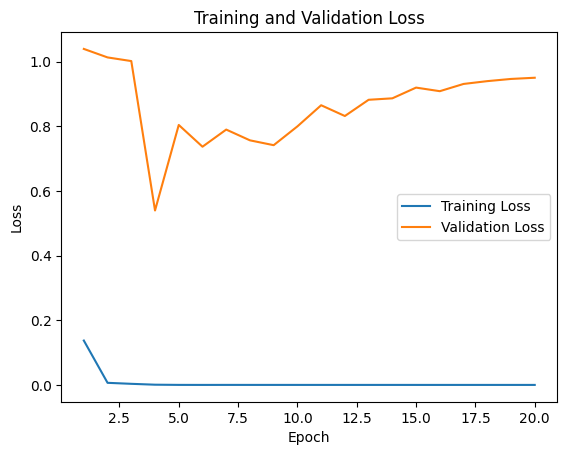

In [ ]:
import matplotlib.pyplot as plt

# Get the loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs_range = range(1, epochs + 1)

# Plot training and validation loss over epochs
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## RESULT

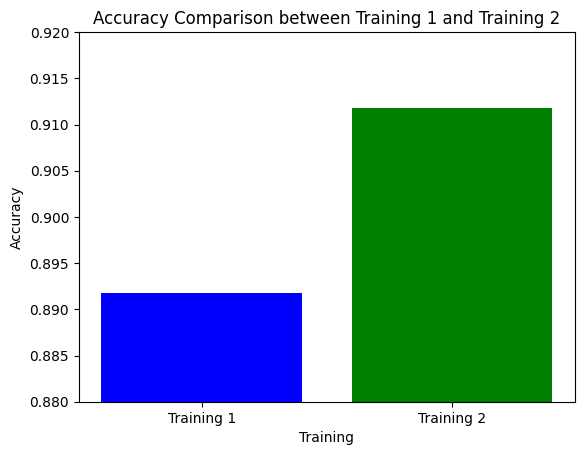

In [ ]:
import matplotlib.pyplot as plt

# Accuracy từ lần train đầu tiên và lần train thứ hai
accuracies = [0.8918, 0.9118]
labels = ['Training 1', 'Training 2']

# Vẽ biểu đồ
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('Accuracy Comparison between Training 1 and Training 2')
plt.xlabel('Training')
plt.ylabel('Accuracy')
plt.ylim(0.88, 0.92)  # Điều chỉnh giới hạn trục y để biểu đồ dễ nhìn hơn
plt.show()
